<a href="https://colab.research.google.com/github/Nandini-007/Fake-News-Detection/blob/master/Fake_news_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import nltk


In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [8]:
df_fake= pd.read_csv("/content/Fake.csv")
df_true= pd.read_csv("/content/True.csv")

In [9]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
df_true.head(7)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"


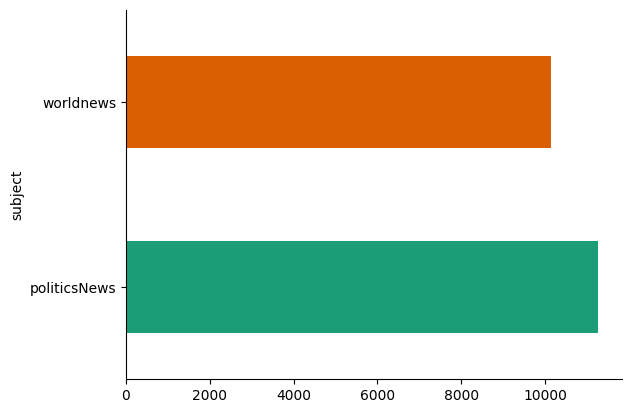

In [11]:
df_true.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
df_fake.shape , df_true.shape

((23481, 4), (21417, 4))

In [13]:
#inserting coloumn for target features
df_fake['target']=0
df_true['target']=1

In [14]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [15]:
#For Manual Testing
df_fake_manual= df_fake.tail(15)
for i in range(23480,23465,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual= df_true.tail(15)
for i in range(21416,21401,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [16]:
df_fake.shape , df_true.shape

((23466, 5), (21402, 5))

In [17]:
df_fake_manual["target"] = 0
df_true_manual["target"] = 1

<ipython-input-17-2225ccf5923e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual["target"] = 0
<ipython-input-17-2225ccf5923e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual["target"] = 1


In [18]:
df_fake_manual.head(5)

,title,text,subject,date,target
23466,Boston Brakes? How to Hack a New Car With Your...,21st Century Wire says For those who still ref...,Middle-east,"January 22, 2016",0
23467,Oregon Governor Says Feds ‘Must Act’ Against P...,"21st Century Wire says So far, after nearly 20...",Middle-east,"January 21, 2016",0
23468,Ron Paul on Burns Oregon Standoff and Jury Nul...,21st Century Wire says If you ve been followin...,Middle-east,"January 21, 2016",0
23469,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,Middle-east,"January 20, 2016",0
23470,Arizona Rancher Protesting in Oregon is Target...,RTOne of the most visible members of the armed...,Middle-east,"January 20, 2016",0


In [19]:
df_true_manual.head(5)

,title,text,subject,date,target
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [20]:
df_manual_testing = pd.concat([df_fake_manual,df_true_manual], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [21]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(15)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [22]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [23]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [24]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [25]:
df = df.sample(frac = 1)
df.head()

,text,target
3787,Donald Trump wants to rule America from his go...,0
17270,,0
12215,GENEVA (Reuters) - The United Nations human ri...,1
15180,"DANANG, Vietnam (Reuters) - A planned meeting ...",1
15800,BELGRADE (Reuters) - Serbia wants to maintain ...,1


In [26]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.head()

,text,target
0,Donald Trump wants to rule America from his go...,0
1,,0
2,GENEVA (Reuters) - The United Nations human ri...,1
3,"DANANG, Vietnam (Reuters) - A planned meeting ...",1
4,BELGRADE (Reuters) - Serbia wants to maintain ...,1


In [27]:
#Creating a function to process the texts
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [28]:
df["text"] = df["text"].apply(wordopt)

In [29]:
x = df["text"]
y = df["target"]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()


In [34]:
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [35]:
#LR
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)
import pickle as pic
pic.dump(LR, open('Logistic.pkl', 'wb'))

pred1 =LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9860925381117946

In [36]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5838
           1       0.99      0.98      0.99      5379

    accuracy                           0.99     11217
   macro avg       0.99      0.99      0.99     11217
weighted avg       0.99      0.99      0.99     11217



In [43]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred2 = DT.predict(xv_test)
pic.dump(DT, open('Decision_tree.pkl', 'wb'))

In [42]:
DT.score(xv_test, y_test)

0.9959882321476331

In [41]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5838
           1       1.00      0.99      1.00      5379

    accuracy                           1.00     11217
   macro avg       1.00      1.00      1.00     11217
weighted avg       1.00      1.00      1.00     11217



In [47]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
pic.dump(RFC, open('Random_forest.pkl', 'wb'))

In [48]:
RFC.score(xv_test, y_test)


0.9903717571543194

In [49]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5838
           1       0.99      0.99      0.99      5379

    accuracy                           0.99     11217
   macro avg       0.99      0.99      0.99     11217
weighted avg       0.99      0.99      0.99     11217



In [57]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred1= LR.predict(new_xv_test)
    pred2 = DT.predict(new_xv_test)
    predrfc = RFC.predict(new_xv_test)

    # Adjusted the format string to match the number of provided arguments
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(output_lable(pred1[0]),output_lable(pred2[0]),
                                                                                                              output_lable(predrfc[0])))

In [59]:

news = "Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’"
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
RFC Prediction: Fake News
